<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>Grover's Search: Implementation </b></font>
<br>
_prepared by Maksim Dimitrijev and Özlem Salehi_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/RHR01e7oN9U)
<br><br><br>

Now we will consider how to implement Grover's search. Let's recall the whole algorithm.

We are given $N=2^n$ elements, and one element is marked. The task is to find this marked element.

We are going to use $n$ qubits. At the beginning we apply Hadamard to each qubit, so we put our quantum state into superposition. The amplitude of each basis state $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $ is set to $ \frac{1}{\sqrt{N}} $. After that we iterate the following algorithm for several times:
<ul>
    <li>Make a query: apply a query oracle operator to qubits - it flips the sign of the amplitude of the state that corresponds to the marked element.</li>
    <li>Inversion: apply a diffusion matrix - the amplitude of each state is reflected over the mean of all amplitudes.</li>
</ul>

Let's check how we can implement the query and inversion operations.

<h3>Query operation</h3>

<h4>Oracle</h4>

Suppose that there exists a function $f:\{0,1\}^n \rightarrow \{0,1\}$ with the following properties:

\begin{align*}
f(x)&=1 &\mbox{ if $x$ is marked}\\
f(x)&=0 &\mbox{ otherwise}
\end{align*}

Grover's algorithm does not actually search a list of elements, but given function $f$ with the above properties, it finds the element $x$ such that $f(x)=1$.


<h3>Task 1 (Discussion)</h3>


Consider the following function $f:\{0,1\}^2 \rightarrow \{0,1\}$. Which element is marked? How many queries should you make to $f$ to find out the marked element in the worst case?
$$
f: \begin{array}{c|c} \mathbf{In} & \mathbf{Out} \\ \hline  \ket{00} & 0 \\ \ket{01} & 0 \\ \ket{10} & 0 \\ \ket{11} & 1      \end{array}
$$


$f$ is often called as the <font color="blue">oracle</font> or blackbox. Even though $f$ might not be reversible, it can be implemented in a reversible manner by using the following idea.

<img src="images/foperator.png" width="20%" align="center">

Here $U_f$, the corresponding quantum operator is defined as follows, where $\oplus$ denotes bitwise addition modulo 2 (XOR). 

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $$

Note that this mapping is reversible. When $\ket{y}=\ket{0}$, you get exactly $f(x)$ in the output qubit.

<h4>Sign flip </h4>

In the rest of the discussion, we will assume that we are given a quantum circuit implementing the operator $U_f$. An operator which flips the sign of the amplitude of the state corresponding to the marked element $x$ can be constructed using <font color="blue">phase-kickback</font>.

Now let's assume that $\ket{y}=\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ and investigate the effect of the operator $U_f$.

\begin{align*}
U_f \ket{x}\ket{-} &= U_f \ket{x}  \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= \frac{1}{\sqrt{2}} (U_f\ket{x}\ket{0}-U_f\ket{x}\ket{1}) \\
&= \frac{1}{\sqrt{2}} (\ket{x}\ket{f(x)\oplus 0} - \ket{x}\ket{f(x)\oplus 1}) \\
&= \ket{x} \frac{1}{\sqrt{2}}\mypar{ \ket{f(x)}-\ket{f(x)\oplus 1}  } \\
&= \ket{x} (-1)^{f(x)} \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= (-1)^{f(x)} \ket{x} \ket{-}
\end{align*}

We have the following transformation:
   $$  \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $$

When $f(x)=1$, we see that a phase of -1 is kicked back to the front of the first register. Hence by preparing the output register in state $\ket{-}$ and applying $U_f$, we obtain the sign flip effect.

Note that even if we don't know anything about $f$ (that's why it is called a blackbox), we are able to flip the sign of the amplitude of the marked element by making a query to $f$ by setting output qubit to $\ket{-}$,



<h3>Task 2</h3>


Let $N=4$. Implement the query phase and check the unitary matrix for the query operator. Note that we are interested in the top-left $4 \times 4$ part of the matrix since the remaining parts are due to the ancilla qubit.

You are given a function $f$ and its corresponding quantum operator $U_f$. 

Now use phase kickback to flip the sign of the marked element:

<ul>
    <li>Set output qubit 2 (third wire) to $\ket{-}$ by applying X and H.</li>
    <li>Apply operator $U_f$
    <li>Set output qubit 2 back.</li>
</ul>

(Can you guess the marked element by looking at the unitary matrix?)

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0 -1.0


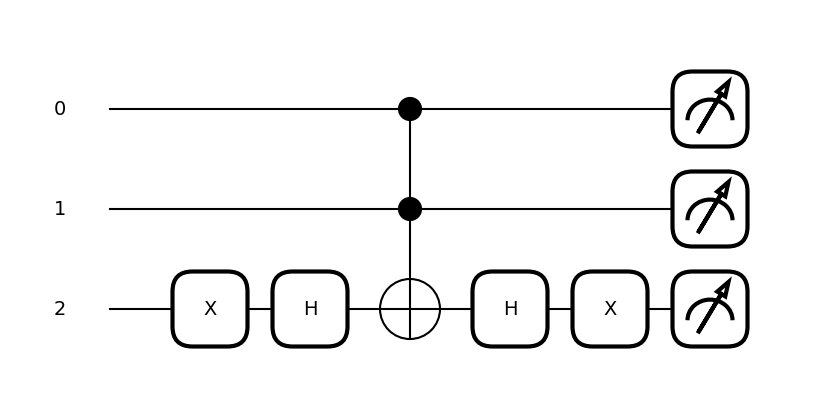

In [3]:
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires = 2 + 1)

def Uf():
    qml.MultiControlledX(wires = [0,1,2], control_values = [1,1])
    

#REMOVE LATER FROM HERE
@qml.qnode(dev)
def mycircuit():
    
    qml.PauliX(2)
    
    qml.Hadamard(2)
    
    Uf()
    
    qml.Hadamard(2)
    
    qml.PauliX(2)
    
    return qml.state()

u = qml.matrix(mycircuit, wire_order = [2,1,0])()

for i in range(4):
    s=""
    for j in range(4):
        val = str(round(u[i][j].real, 3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
fig, ax = qml.draw_mpl(mycircuit)()

plt.show()

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task2">click for our solution</a>

<hr>

In Task 2, we see that the query operator looks like an identity operator with one of the entries being equal to -1, which is responsible for the sign flip. 

$\mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1}$.

By looking at the matrix, we can guess that the marked element is $\ket{11}$. Note that in general one is not able to peek at the matrix corresponding to the query operator and therefore it is not possible to find out the marked element after a single query. 

<h3>Inversion operator </h3>

[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/L9W2f74s7gs)
<br><br><br>

To implement the inversion (diffusion) operation, we will need additional (ancilla) qubit. This is how we implement the inversion operator:

<ul>
    <li>Set the ancilla qubit to $\ket{-}$ by applying X and H.</li>
    <li>Apply H to all qubits other than the ancilla.</li>
    <li>Apply X to all qubits other than the ancilla.</li>
    <li>Apply multiple controlled NOT operator, where the ancilla qubit is target and all other qubits are used for controlling.</li>
    <li>Apply X to the ancilla qubit.</li>
    <li>Apply X to all qubits other than the ancilla.</li>
    <li>Apply H to all qubits other than the ancilla.</li>
    <li>Set ancilla qubit back by applying X and H.</li>
</ul>

<h4>Why these gates are chosen? (Optional) </h4>

Now let's try to understand why these gates are chosen. Let's recall the inversion operator:

$$ 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    } 
- I . $$


This operator is also called the <font color="blue"> diffusion operator</font>. 

Recall that the diffusion operator can be expressed as $D=2\ket{u}\bra{u}-I$ where $\ket{u}=H^{\otimes n}\ket{0^n}$ is the equal superposition vector. We will simply denote $\ket{0^n}$ by $\ket{\mathbf{0}}$.


- To start with let's express $D$ as follows:

\begin{align*}
D=2\ket{u}\bra{u}-I &= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-I \\
&= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}H^{\otimes n}\\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}) \\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}-I)H^{\otimes n}
\end{align*}

<font color="blue"><i>Looking at this expression, it is clear why we have H gates at the beginning and at the end</i>

- Now let us look at the effect of applying $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ to any arbitrary state.

$(2\ket{\mathbf{0}}\bra{\mathbf{0}}-I) \ket{x} = 2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x} .$

If $\ket{x}=\ket{\mathbf{0}}$, since $\braket{\mathbf{0}}{\mathbf{0}}=1$, then $2\ket{\mathbf{0}}\braket{\mathbf{0}}{\mathbf{0}}-\ket{\mathbf{0}} = 2\ket{\mathbf{0}}-\ket{\mathbf{0}} = \ket{\mathbf{0}}$.

If $\ket{x}\neq \ket{\mathbf{0}}$, since $\braket{\mathbf{0}}{x}=0$, then $2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x}= 2\ket{\mathbf{0}}\cdot 0 -\ket{x} = -\ket{x}$.

Hence, the effect of $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$  is flipping the amplitude of any state except $\ket{\mathbf{0}}$.

- Now let's see how we can implement this operator. Let's define function $g$ as follows and let $U_g$ be the corresponding operator. 

\begin{align*}
g(x)&=0 &\mbox{ if $x$ is $\ket{\mathbf{0}}$ }\\
g(x)&=1 &\mbox{ otherwise},
\end{align*}



Let's set ancilla qubit to state $\ket{-}$ and apply operator $U_g$.
\begin{align*}
U_g \ket{x}\ket{-} &= (-1)^{g(x)} \ket{x} \ket{-}.
\end{align*}


Note that $U_g$ flips the amplitudes of the states other than $\ket{\mathbf{0}}$ and exactly implements $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$.

- How to implement $U_g$?

Consider $g'$ which is exactly the opposite of $g$.

\begin{align*}
g'(x)&=1 &\mbox{ if $x$ is $\ket{\mathbf{0}}$ }\\
g'(x)&=0 &\mbox{ otherwise},
\end{align*}

To implement $U_g'$, we should output 1 when $x$ is $\ket{\bf 0}$, that is we should apply $X$ gate to the output qubit when all input qubits are in state 0. 

<font color="blue"> <i> That's why we first apply $X$ gate to the control qubits and then apply multiple controlled NOT gate where the target is the ancilla qubit. Afterwards, we set the control qubits back (Recall the multiple controlled constructions notebook.). </i>

We have just obtained the opposite effect of $g$: the output qubit is set to 1 if all input qubits are in state 0. 

<font color="blue"><i>Therefore we apply $X$-gate to the ancila qubit so that the output is 1 when $x$ is not $\ket{\bf{0}}$ and the output is 0 otherwise. </i>

<h3>Task 3</h3>

Let $N=4$. Implement the inversion operator and check whether you obtain the following matrix:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

In [5]:


def inversion():
    for i in range(2):
        qml.Hadamard(i)
        qml.PauliX(i)
    

    qml.MultiControlledX(wires = [1,0,2], control_values = [1,1])

    for i in range(2):
        qml.PauliX(i)
        qml.Hadamard(i)
        
    
    qml.PauliX(2)
    
    


Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in the top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

 -0.5  0.5  0.5  0.5
  0.5 -0.5  0.5  0.5
  0.5  0.5 -0.5  0.5
  0.5  0.5  0.5 -0.5


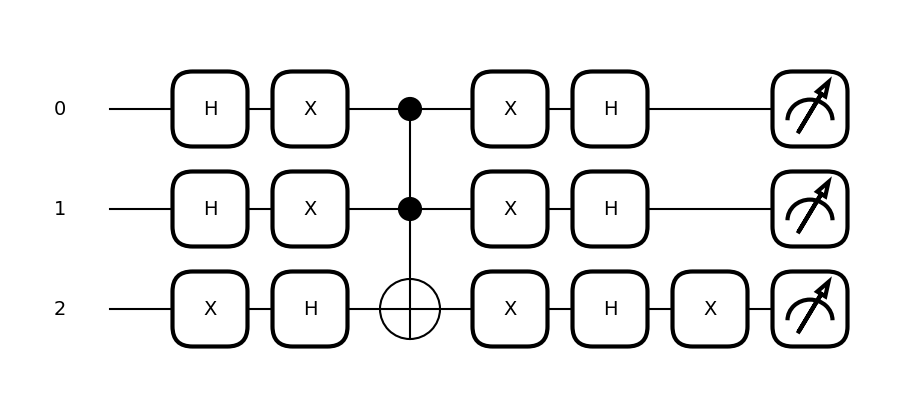

In [6]:
dev_inv = qml.device('default.qubit', wires = 3)

@qml.qnode(dev_inv)
def mycircuit1():
    qml.PauliX(2)
    qml.Hadamard(2)
    inversion()
    qml.Hadamard(2)
    qml.PauliX(2)
    return qml.state()

u_inv = qml.matrix(mycircuit1, wire_order = [2,1,0])()

for i in range(4):
    s=""
    for j in range(4):
        val = str(round(u_inv[i][j].real, 3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)


fig, ax = qml.draw_mpl(mycircuit1)()
plt.show()

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

You are given the operator $U_f$. 
The qubit with index 2 (third wire) is the ancilla qubit and it is shared by the query and the inversion operators.
    
Which state do you observe the most? 

11 is observed 10000 times


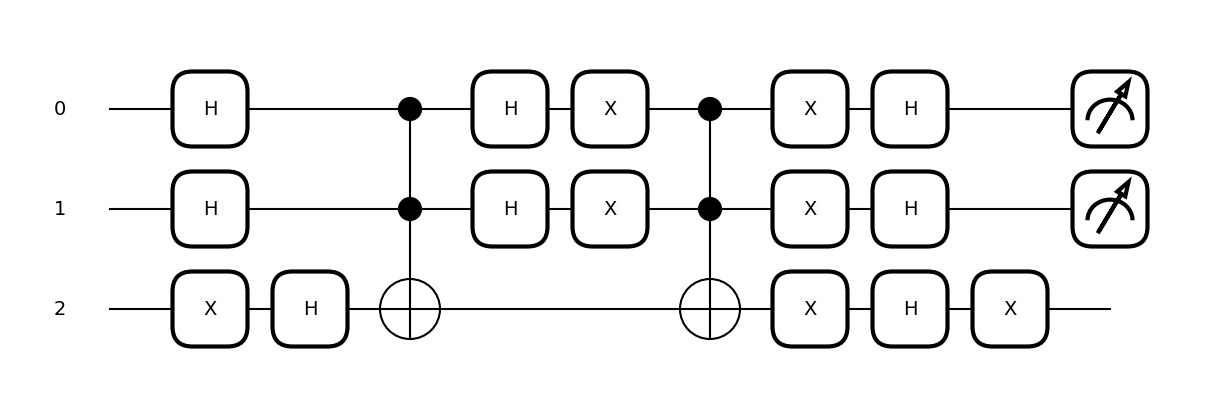

In [7]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=3, shots=10000)

# use inversion and uf from before

@qml.qnode(dev)
def grover_circuit():

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    Uf()
    inversion()
    qml.Hadamard(wires=2)
    qml.PauliX(wires=2)
    

    return qml.sample(wires=[0, 1])

samples = grover_circuit()

bitstrings = ["".join(str(b) for b in s) for s in samples]
from collections import Counter
counts = Counter(bitstrings)

for outcome, count in counts.items():
    print(f"{outcome} is observed {count} times")


fig, ax = qml.draw_mpl(grover_circuit)()
plt.show()


<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to implement not gate controlled by three qubits.

In the implementation the ancilla qubit will be qubit 3, while qubits for control are 0, 1 and 2; qubit 4 is used for the multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

In [8]:
def big_inversion():
    for i in range(3):
        qml.Hadamard(i)
        qml.PauliX(i)
    qml.MultiControlledX(wires = [1,0,4], control_values = [1,1])
    qml.MultiControlledX(wires = [2,4,3], control_values = [1,1])
    qml.MultiControlledX(wires = [1,0,4], control_values = [1,1])
    for i in range(3):
        qml.PauliX(i)
        qml.Hadamard(i)
    qml.PauliX(3)



Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

 -0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25 -0.75  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25 -0.75  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25 -0.75  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25 -0.75  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25 -0.75  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25 -0.75  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.75


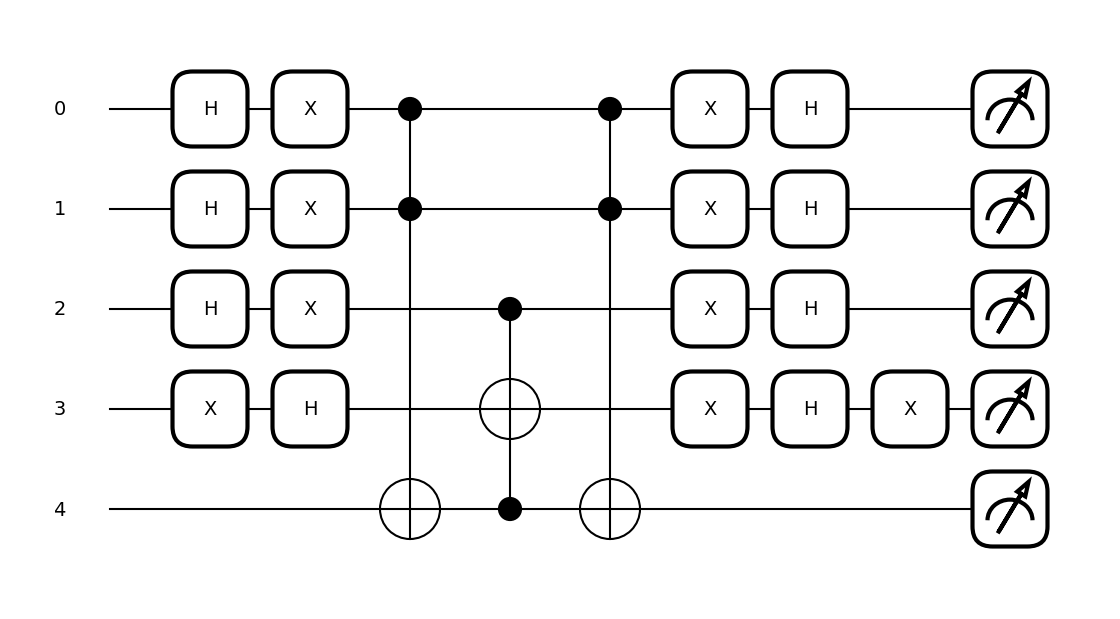

In [9]:
big_dev = qml.device('default.qubit', wires = 5)

@qml.qnode(big_dev)
def big_mycircuit2():
    qml.PauliX(3)
    qml.Hadamard(3)
    big_inversion()
    qml.Hadamard(3)
    qml.PauliX(3)
    return qml.state()


# Make note about wiring order!
u_big = qml.matrix(big_mycircuit2, wire_order = [4,3,2,1,0])()



for i in range(8):
    s=""
    for j in range(8):
        val = str(round(u_big[i][j].real, 3))
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)


fig, ax = qml.draw_mpl(big_mycircuit2)()
plt.show()

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6: Testing Grover's search for 8 elements (Optional, challenging)</h3>

Now we will test Grover's search on 8 elements.

You are given the operator $U_{f_8}$. First run the following cell to load it. You can access it via:

<pre>Uf_8()</pre>
    
Which state do you observe the most?

110 is observed 7826 times
101 is observed 323 times
000 is observed 301 times
111 is observed 304 times
010 is observed 303 times
011 is observed 316 times
100 is observed 308 times
001 is observed 319 times


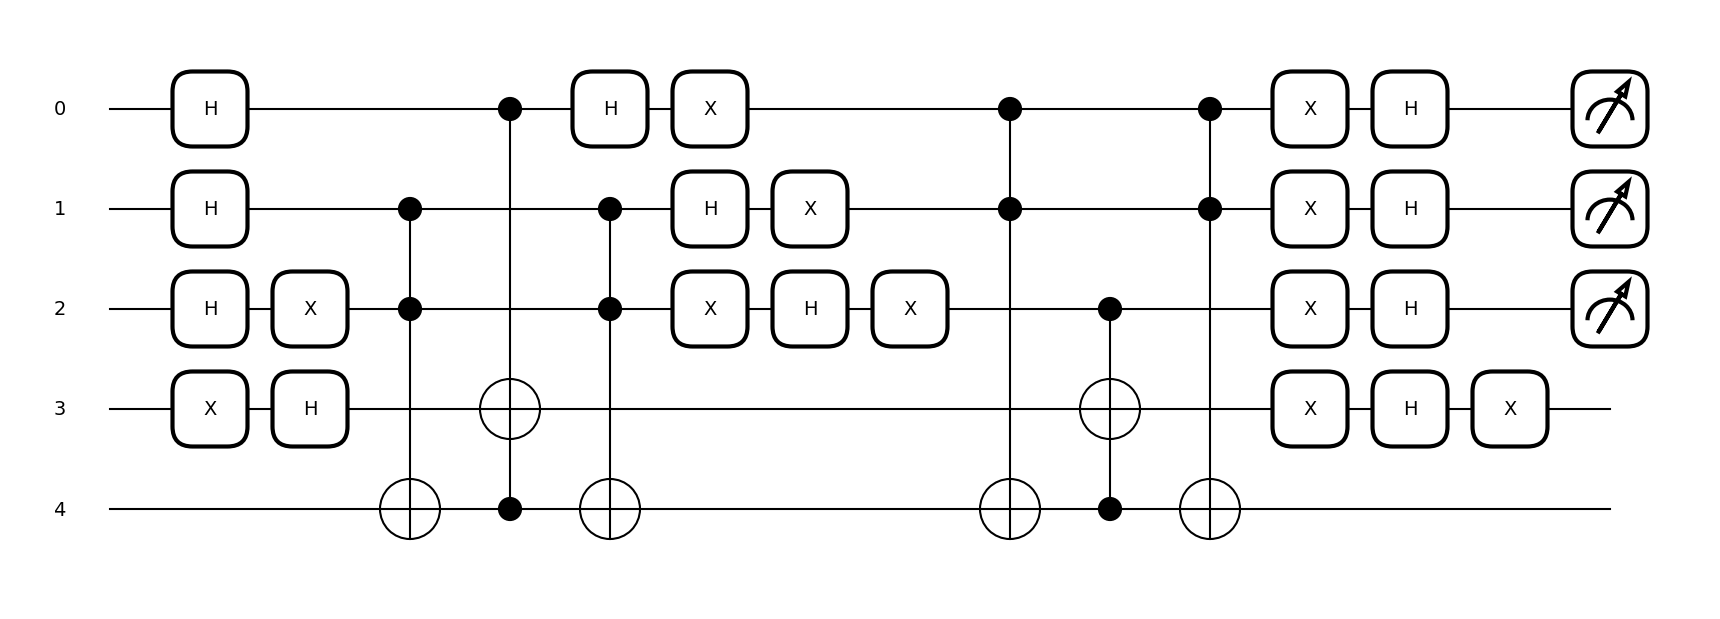

In [10]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=5, shots=10000)

# use inversion and uf from before

def Uf_8():
    qml.PauliX(wires=2)
    qml.Toffoli(wires=[2,1,4])
    qml.Toffoli(wires=[4,0,3])
    qml.Toffoli(wires=[2,1,4])
    qml.PauliX(wires=2)
    


@qml.qnode(dev)
def grover_circuit():

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)


    qml.PauliX(wires=3)
    qml.Hadamard(wires=3)

    Uf_8()
    big_inversion()
    qml.Hadamard(wires=3)
    qml.PauliX(wires=3)
    

    return qml.sample(wires=[0, 1, 2])

samples = grover_circuit()

bitstrings = ["".join(str(b) for b in s) for s in samples]
from collections import Counter
counts = Counter(bitstrings)

for outcome, count in counts.items():
    print(f"{outcome} is observed {count} times")


fig, ax = qml.draw_mpl(grover_circuit)()
plt.show()


<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task6">click for our solution</a>

<h3>Designing oracle functions</h3>

Oracle function $f$ depends on the problem you want to solve. You can model many different problems (such as graph coloring, traveling salesman and many more) as a search problem. Elements in your search space correspond to quantum states. Instead of searching the whole space, you design $f$ so that it checks whether an element in the search space is the actual solution and marks it by outputing 1. Then you can use Grover's search to find the solution. 

Now we will design a very simple oracle function, which simply marks one of the elements. Suppose that $N=4$. Our elements in the search space are $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$ and suppose that we want to mark the element $\ket{11}$. This means that the function should output 1 if the input qubits are in state 1. This can be simply accomplished with the following function:

In [11]:
def oracle_11():
    # Create a dummy QNode to pass into qml.matrix
    @qml.qnode(dev)
    def dummy_circuit():

        qml.PauliX(wires=2)
        qml.Hadamard(wires=2)

        qml.Toffoli(wires=[0, 1, 2])
        qml.Hadamard(wires=2)
        qml.PauliX(wires=2)
        return qml.state()

    return qml.matrix(dummy_circuit, wire_order=[2, 1, 0])()




Here [0] and [1] are the input qubits and [2] is the output qubit. Let's check the matrix corresponding to the query phase.

In [12]:
# Extract the unitary
U = oracle_11()

# Print the top-left 4x4 real part (as in Qiskit)
print("Bottom-right 4x4 submatrix (real parts):")
for i in range(4):
    s = ""
    for j in range(4):
        val = f"{U[i][j].real:.3f}"
        while len(val) < 6:
            val = " " + val
        s += val
    print(s)



Bottom-right 4x4 submatrix (real parts):
 1.000 0.000 0.000 0.000
 0.000 1.000 0.000 0.000
 0.000 0.000 1.000 0.000
 0.000 0.000 0.000-1.000


Let's check another example, now our marked element is $\ket{01}$.

In [13]:
def oracle_01():
    # Create a dummy QNode to pass into qml.matrix
    @qml.qnode(dev)
    def dummy_circuit():

        qml.PauliX(wires=2)
        qml.PauliX(wires=1)
        qml.Hadamard(wires=2)

        qml.Toffoli(wires=[0, 1,2])
        qml.Hadamard(wires=2)
        qml.PauliX(wires=1)
        qml.PauliX(wires=2)
        return qml.state()

    return qml.matrix(dummy_circuit,wire_order=[2, 1, 0])()

# Extract the unitary
U = oracle_01()

for i in range(4):
    s = ""
    for j in range(4):
        val = f"{U[i][j].real:.3f}"
        while len(val) < 6:
            val = " " + val
        s += val
    print(s)


 1.000 0.000 0.000 0.000
 0.000-1.000 0.000 0.000
 0.000 0.000 1.000 0.000
 0.000 0.000 0.000 1.000


<h3>Task 7</h3>

Implement an oracle function which marks the element $\ket{00}$. Run Grover's search with the oracle you have implemented. 

In [14]:
# Function to extract matrix
def oracle_00():
    qml.PauliX(wires=2)
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)

    qml.Toffoli(wires=[0, 1, 2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)


00 is observed 8123 times
11 is observed 646 times
10 is observed 611 times
01 is observed 620 times


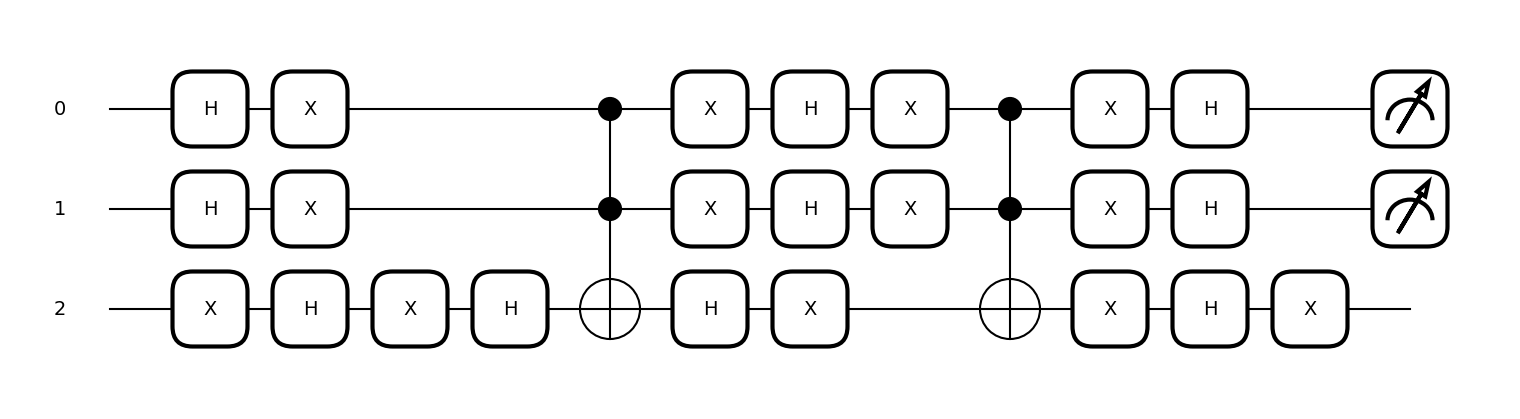

In [76]:

import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=5, shots=10000)

num_iterations=1

@qml.qnode(dev)
def grover_circuit():

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)


    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    for _ in range(num_iterations):
            oracle_00()     # Oracle marks the state
            inversion() 
    qml.Hadamard(wires=2)
    qml.PauliX(wires=2)
    

    return qml.sample(wires=[0, 1])



samples = grover_circuit()


bitstrings = ["".join(str(b) for b in s) for s in samples]
from collections import Counter
counts = Counter(bitstrings)

for outcome, count in counts.items():
    print(f"{outcome} is observed {count} times")


fig, ax = qml.draw_mpl(grover_circuit)()
plt.show()




<h3>Task 8</h3>
Now create a general grovers search algorithm, that takes in a given number of qubits and an array of marked elements, as well as a number of iterations, and returns the sample after 10 000 shots.

In [75]:
from collections import Counter


def general_inversion(Num_qubits):
    for i in range(Num_qubits):
        qml.Hadamard(i)
        qml.PauliX(i)
    qml.PauliX(Num_qubits)
    qml.Hadamard(Num_qubits)
    qml.MultiControlledX(wires = [n for n in range(Num_qubits+1)])
    qml.PauliX(Num_qubits)
    qml.Hadamard(Num_qubits)
    qml.PauliX(Num_qubits)
    for i in range(Num_qubits):
        qml.PauliX(i)
        qml.Hadamard(i)



def general_oracle(N, marked_indices):
    total_qubits = N + 1  # N data qubits + 1 ancilla
    dev = qml.device("default.qubit", wires=total_qubits)

    # Format all marked indices as reversed binary strings
    binaries = [format(i, f"0{N}b")[::-1] for i in marked_indices]

    for binary in binaries:
            # 1. Prepare ancilla in |-⟩ = H X |0⟩
        qml.PauliX(wires=N)
        qml.Hadamard(wires=N)

            # 2. Flip input qubits for 0s
        for i, bit in enumerate(binary):
            if bit == '0':
                qml.PauliX(wires=i)

        # 3. Apply multi-controlled X with ancilla as target
        qml.MultiControlledX(wires=list(range(N)) + [N])

        # 4. Unflip input qubits
        for i, bit in enumerate(binary):
            if bit == '0':
                qml.PauliX(wires=i)

        # 5. Unprepare ancilla
        qml.Hadamard(wires=N)
        qml.PauliX(wires=N)

def grover_circuit(N, marked_indices, iterations):
    dev = qml.device("default.qubit", wires=N+1, shots=10000)

    @qml.qnode(dev)
    def circuit():
        data_wires = list(range(N))
        ancilla = N

        # Step 1: Apply Hadamards
        for wire in data_wires:
            qml.Hadamard(wires=wire)

        # Step 2: Prepare ancilla in |->
        qml.PauliX(wires=ancilla)
        qml.Hadamard(wires=ancilla)

        # Step 3: Grover iterations
        for _ in range(iterations):
            general_oracle(N, marked_indices)
            general_inversion(N)
            


        # Step 4: Undo ancilla
        qml.Hadamard(wires=ancilla)
        qml.PauliX(wires=ancilla)

        return qml.sample(wires=data_wires)

    return circuit()




<h3>Task 9 (Optional)</h3>

Let $N=8$ with marked elements $\ket{001}$ and $\ket{111}$. Run Grover's search with the general function you have implemented. 

In [72]:
samples = grover_circuit(3, [0,7], 1)



# Reverse each sample to match PennyLane's little-endian bitstring order
bitstrings = ["".join(str(b) for b in reversed(s)) for s in samples]

counts = Counter(bitstrings)

# Sort and print
for outcome in sorted(counts.keys()):
    print(f"{outcome} is observed {counts[outcome]} times")






000 is observed 3199 times
001 is observed 610 times
010 is observed 569 times
011 is observed 591 times
100 is observed 616 times
101 is observed 659 times
110 is observed 598 times
111 is observed 3158 times


<h3>Task 10 (Optional)</h3>
Draw a general circuit for N=3, marked elements |000>, |111>, |010>, with 2 iterations.

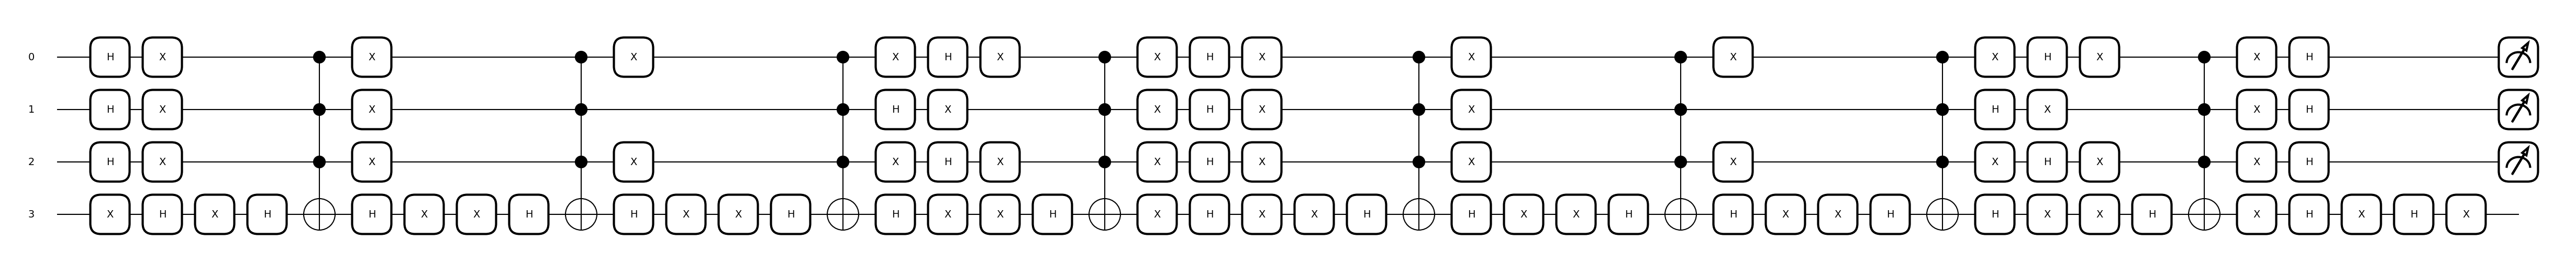

In [80]:
def make_grover_circuit(N, marked_indices, iterations):
    dev = qml.device("default.qubit", wires=N+1)

    @qml.qnode(dev)
    def circuit():
        data_wires = list(range(N))
        ancilla = N

        for wire in data_wires:
            qml.Hadamard(wires=wire)

        qml.PauliX(wires=ancilla)
        qml.Hadamard(wires=ancilla)

        for _ in range(iterations):
            general_oracle(N, marked_indices)
            general_inversion(N)

        qml.Hadamard(wires=ancilla)
        qml.PauliX(wires=ancilla)

        return qml.sample(wires=data_wires)

    return circuit


# Create circuit and draw
qc = make_grover_circuit(3, [0, 7,2], iterations=2)
fig, ax = qml.draw_mpl(qc)()
plt.show()

Further links:

http://quantumgazette.blogspot.com/2017/12/grovers-algorithm-for-unstructured.html

http://twistedoakstudios.com/blog/Post2644_grovers-quantum-search-algorithm